In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [122]:
data_dirct='/home/varun/Downloads/DataBase and Material/RSCCASN.csv'

In [123]:
data=pd.read_csv(data_dirct,parse_dates=True,index_col='DATE')
data


,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2018-08-01,23209
2018-09-01,19958
2018-10-01,21337


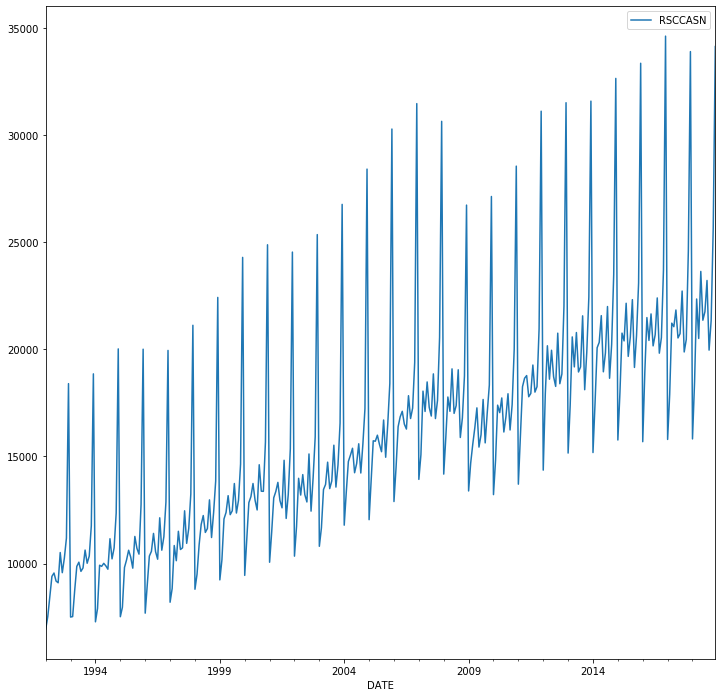

In [124]:
data.plot(figsize=(12,12))

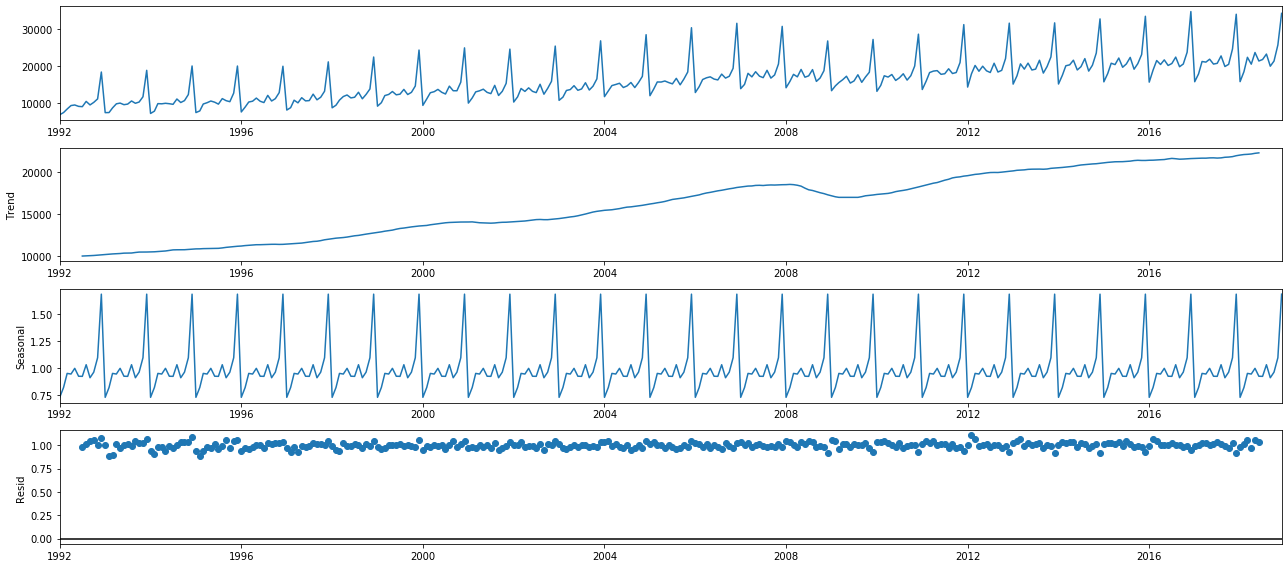

In [125]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize']=18,8
decompostion=sm.tsa.seasonal_decompose(data,model='multiplicative')
decompostion.plot()
plt.show()

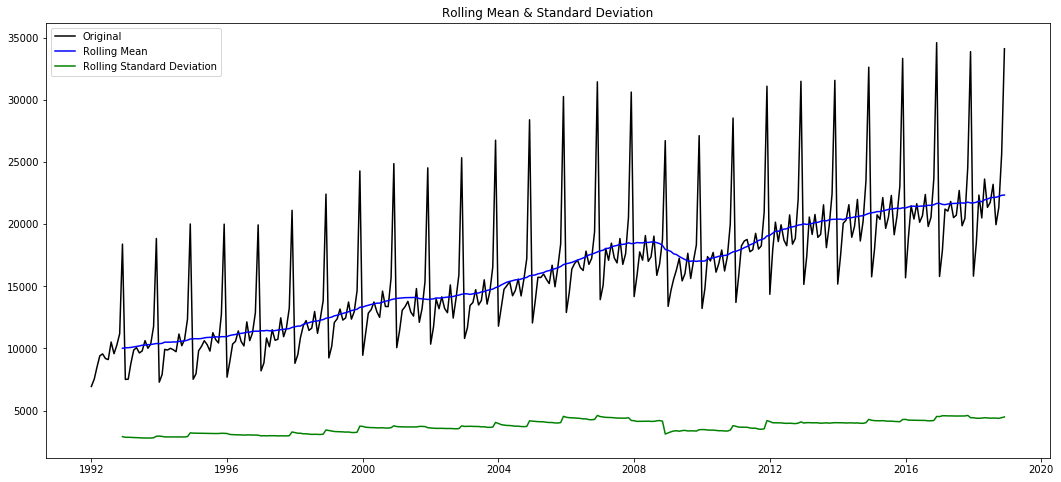

In [126]:
"""
    Graphical REpresentation of the Rolling Mean and Rolling Std. Deviation on the whole dataset
    This will some how help  in estimating the whether the dataset is Stationary or not.
"""
roll_mean=data.rolling(12).mean()
roll_std=data.rolling(12).std()
plt.plot(data, color='black',label='Original')
plt.plot(roll_mean,color="blue",label='Rolling Mean')
plt.plot(roll_std,color='green',label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)



In [127]:
# Basic Method to check the dataset
# X=data.values
# split=round(len(X)/2)
# X1=X[0:split]
# X2=X[split:]
# mean1,mean2=X1.mean(),X2.mean()
# var1,var2=X1.var(),X2.var()

In [128]:
# print('mean1=%f, mean2=%f' % (mean1, mean2))
# print('variance1=%f, variance2=%f' % (var1, var2))

In [129]:
# """
#     On Seeing the Mean and Varianceof the dataset it can be conffered that the Dataset is non-stationary
# """

In [130]:
#Using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def dickey_test(data):
    X_dickey=data.values
    result = adfuller(X_dickey)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [131]:
dickey_test(data)

ADF Statistic: -0.507465
p-value: 0.890551
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [132]:
"""
    Here, ADF value is greater than the critical value
    SO NULL Hypothesis is accepted 
    i.e The Dataset is non-Stationary
"""

'\n    Here, ADF value is greater than the critical value\n    SO NULL Hypothesis is accepted \n    i.e The Dataset is non-Stationary\n'

ADF Statistic: -1.269111
p-value: 0.643183
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


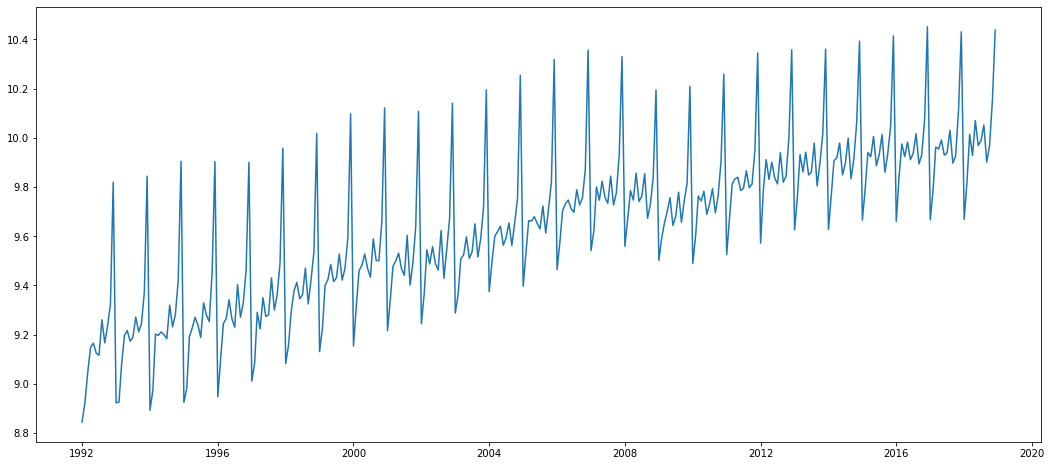

In [133]:
#Log Transforming the dataset to make it Stationary
import math
log_data=np.log(data)
# result = adfuller(X_dickey)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))
    
dickey_test(log_data)
plt.plot(log_data)

In [134]:
"""
    Even after applying, the Log Tansform to the dataset
    The data appears to be in non-stationary form
"""

'\n    Even after applying, the Log Tansform to the dataset\n    The data appears to be in non-stationary form\n'

In [135]:
# #Applying Manual Difference Transform to the data to make it Stationary
# def difference(dataset, interval=365):
#     diff=list()
#     for i in range(interval, len(dataset)):
#         value=dataset[i]-dataset[i-interval]
#         diff.append(value)
#         print(diff.append(value))
#     return diff
    
# def inverted(last_obsv, value):
#     return last_obsv+value

# diff=difference(data['RSCCASN'].values)
# print(diff)
# plt.plot(diff)
# plt.show()
# inverted=[inverted(data[i],diff[i]) for i in range(len(diff))]

# # print(inverted)

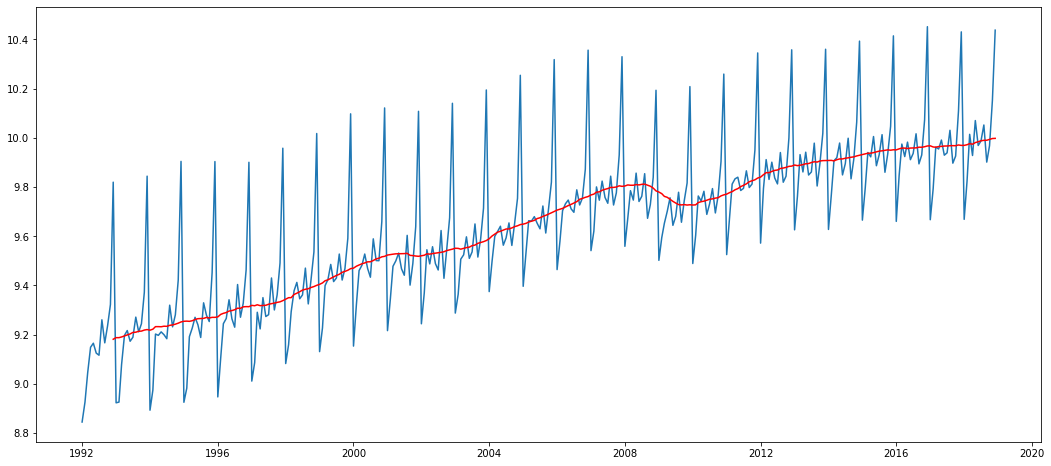

In [136]:
#Applying rolling mean to the log dataset
moving_average=log_data.rolling(window=12).mean()
plt.plot(log_data)
plt.plot(moving_average,color='red')

In [137]:
log_data_moving_average=log_data.RSCCASN-moving_average.RSCCASN
log_data_moving_average

DATE
1992-01-01         NaN
1992-02-01         NaN
1992-03-01         NaN
1992-04-01         NaN
1992-05-01         NaN
                ...   
2018-08-01    0.062379
2018-09-01   -0.088887
2018-10-01   -0.025592
2018-11-01    0.155056
2018-12-01    0.439889
Name: RSCCASN, Length: 324, dtype: float64

In [138]:
log_data_moving_average.dropna( inplace=True)
dickey_test(log_data_moving_average)


ADF Statistic: -3.757931
p-value: 0.003368
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [139]:
"""
    After, Applying the rolling mean to the data
    Stationary Dataset is achieved
"""

'\n    After, Applying the rolling mean to the data\n    Stationary Dataset is achieved\n'

In [140]:
#Diffrence method to make the dataset staionary !!!! Most effective
#Also using this to remove further trends and seasonality
log_data_diff=log_data.RSCCASN-log_data.RSCCASN.shift()
log_data_diff

DATE
1992-01-01         NaN
1992-02-01    0.081084
1992-03-01    0.119023
1992-04-01    0.103695
1992-05-01    0.016562
                ...   
2018-08-01    0.064742
2018-09-01   -0.150910
2018-10-01    0.066813
2018-11-01    0.184179
2018-12-01    0.285409
Name: RSCCASN, Length: 324, dtype: float64

In [141]:
# #Method to remove the missing data from the dataset 
# nan_value=float("NaN")
# log_data_diff.replace(" ", nan_value, inplace=True)
# log_data_diff.dropna(subset = ["RSCCASN"], inplace=True)
log_data_diff.dropna( inplace=True)
dickey_test(log_data_diff)


ADF Statistic: -3.964860
p-value: 0.001606
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


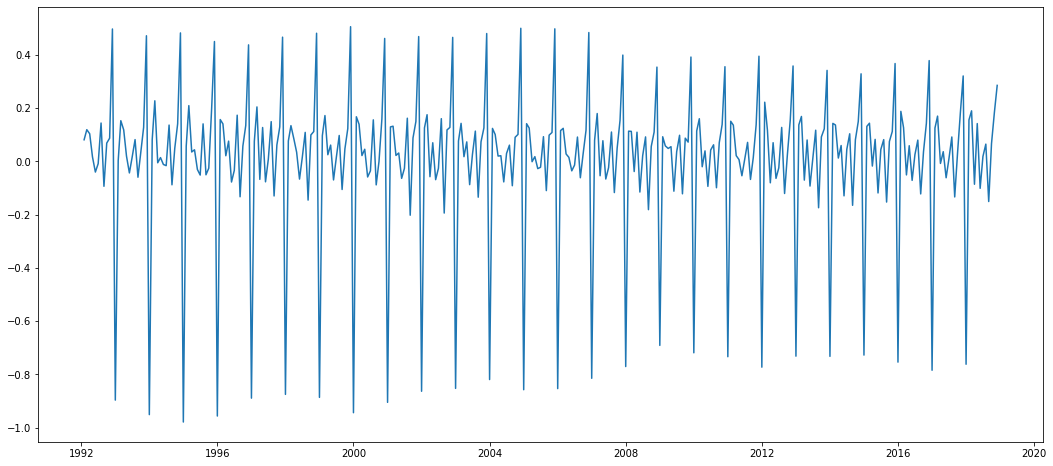

In [142]:
plt.plot(log_data_diff)

In [143]:
"""
    After, Applying the Diffrence to the data
    Stationary Dataset is achieved
"""

'\n    After, Applying the Diffrence to the data\n    Stationary Dataset is achieved\n'

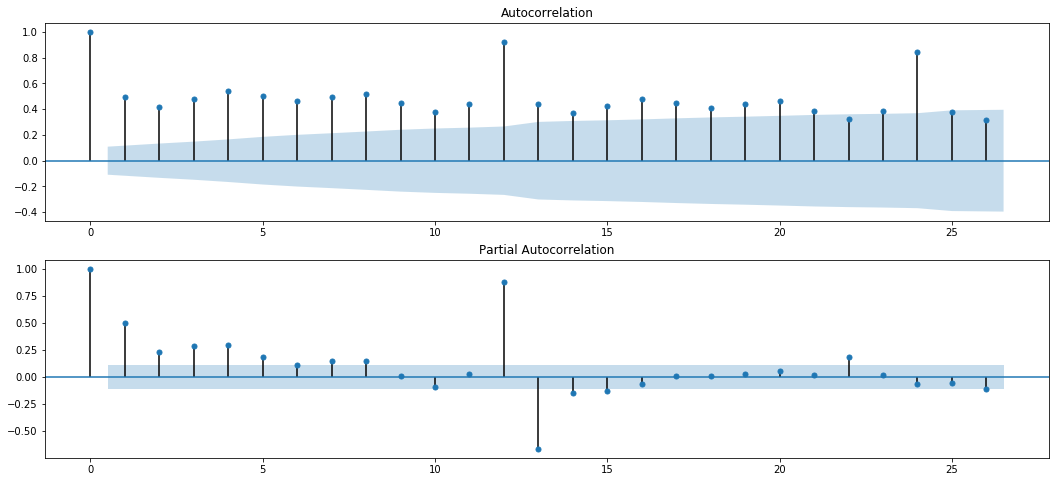

In [144]:
#Plotting the ACF and PACF graph 
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(data,  ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data, ax=ax[1], method='ywm' )
plt.show()



Optimization terminated successfully.
         Current function value: 7.219680
         Iterations: 3
         Function evaluations: 139


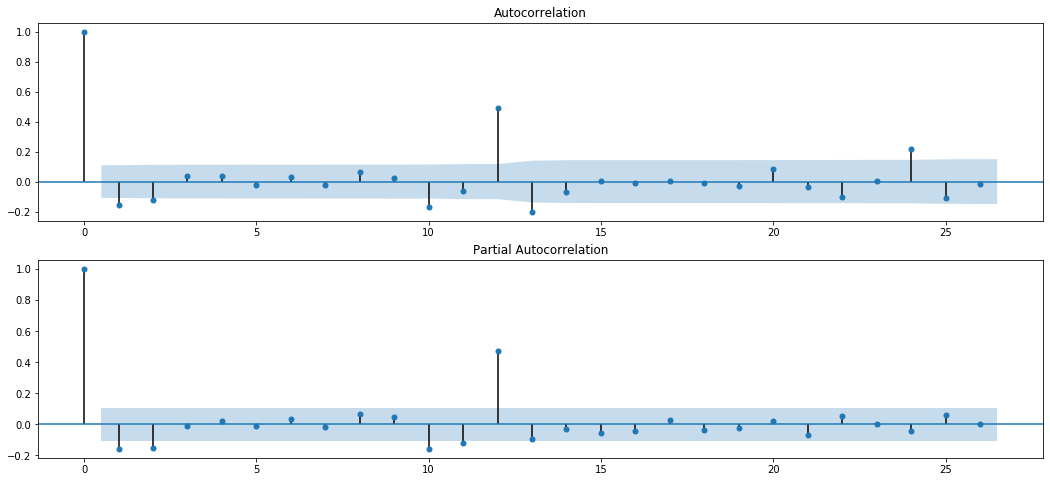

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            RSCCASN   No. Observations:                  324
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 36)   Log Likelihood               -2339.176
Date:                            Fri, 05 Jun 2020   AIC                           4686.352
Time:                                    17:21:24   BIC                           4700.990
Sample:                                01-01-1992   HQIC                          4692.219
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0082      0.034      0.241      0.810      -0.059       0.075
ma.L1         -0.6731      0.048    -13.945      0.000      -0.768      -0.578
ma.S.L36      -0.1678      0.031     -5.461      0.000      -0.228      -0.108
sigma2      6.108e+05   3.45e+04     17.694      0.000    5.43e+05    6.78e+05
===================================================================================
Ljung-Box (Q):                      255.18   Jarque-Bera (JB):               221.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.48
Prob(H) (two-sided):                  0.91   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
import warnings
warnings.filterwarnings("ignore")
"""
    Intiating the Sarima model on the parameters estimated by seeing the 
    ACF and PACF plot
"""
model=sm.tsa.statespace.SARIMAX(data,order=(1,1,1),seasonal_order=(0,1,1,36)).fit(max_iter=50,method="powell")

res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, ax=ax[1])
plt.show()
model.summary()

In [50]:
print(model.aic)

4686.352335582351


In [279]:
"""

    Using GridSerachCV to find the optimized parameters for the 
    SARIMA Model
    
    Various parameters will be used to made the model and the model 
    with the lowest AIC(Akaike’s Information Criterion )
    will be selected for its parameter


"""

import itertools
import warnings
warnings.filterwarnings("ignore")
#set parampandasrange
p = range(0,3)
q = range(1,3)
d = range(1,2)
s = range(36,37)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))

seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(data,
                                    order=param,
                                    seasonal_order=param_seasonal)
        
            results = mod.fit(max_iter = 50, method = 'powell')
            
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 7.219710
         Iterations: 2
         Function evaluations: 67
SARIMA(0, 1, 1),(0, 1, 1, 36) - AIC:4684.372382454479
Optimization terminated successfully.
         Current function value: 7.172718
         Iterations: 2
         Function evaluations: 88
SARIMA(0, 1, 1),(0, 1, 2, 36) - AIC:4655.921522764716
Optimization terminated successfully.
         Current function value: 7.153786
         Iterations: 6
         Function evaluations: 287
SARIMA(0, 1, 1),(1, 1, 1, 36) - AIC:4643.653204077363
Optimization terminated successfully.
         Current function value: 7.176638
         Iterations: 2
         Function evaluations: 113
SARIMA(0, 1, 1),(1, 1, 2, 36) - AIC:4660.461176687004
Optimization terminated successfully.
         Current function value: 7.160900
         Iterations: 3
         Function evaluations: 178
SARIMA(0, 1, 1),(2, 1, 1, 36) - AIC:4650.262897277384
Optimization terminated successfully.
    

In [257]:
"""
    On applying Grid Search Cv
    The parameter with lowest AIC(Akaike information criterion) is considered optimal
    In my case it is (2,1,2)(2,1,2,36)

"""

'\n    On applying Grid Search Cv\n    The parameter with lowest AIC(Akaike information criterion) is considered optimal\n    In my case it is (2,1,2)(2,1,2,36)\n\n'

In [258]:
n_test=20
test_ind=len(data)-n_test
train, test = data[:test_ind], data[test_ind:]

In [259]:
# fit SARIMA based on Grid Search CV hypertune
train2=data.copy()

sar = sm.tsa.statespace.SARIMAX(np.log(train.RSCCASN), 
                                order=(2,1,2), 
                                seasonal_order=(2,1,2,36)).fit(max_iter = 50, method = 'powell')
sar.summary()

Optimization terminated successfully.
         Current function value: -1.676222
         Iterations: 6
         Function evaluations: 686


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            RSCCASN   No. Observations:                  304
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 36)   Log Likelihood                 509.571
Date:                            Fri, 05 Jun 2020   AIC                          -1001.143
Time:                                    19:06:42   BIC                           -968.858
Sample:                                01-01-1992   HQIC                          -988.174
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7487      0.263     -2.844      0.004      -1.265      -0.233
ar.L2         -0.2797      0.101     -2.773      0.006      -0.477      -0.082
ma.L1          0.0708      0.268      0.264      0.792      -0.454       0.596
ma.L2         -0.1983      0.190     -1.044      0.297      -0.571       0.174
ar.S.L36      -0.3655     36.841     -0.010      0.992     -72.573      71.842
ar.S.L72       0.4274     31.805      0.013      0.989     -61.909      62.764
ma.S.L36       0.0701     36.856      0.002      0.998     -72.166      72.307
ma.S.L72      -0.2785     20.940     -0.013      0.989     -41.319      40.762
sigma2         0.0012   9.72e-05     12.525      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      139.30   Jarque-Bera (JB):                26.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.19
Prob(H) (two-sided):                  0.57   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

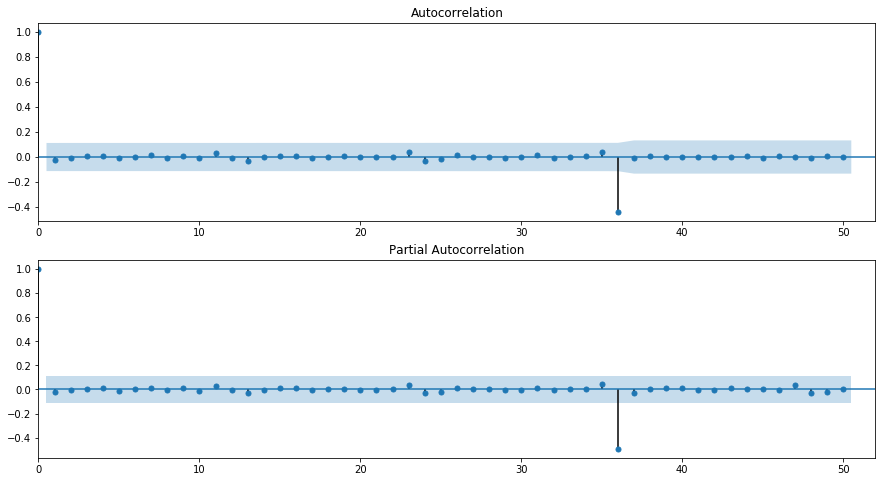

In [150]:
"""
    ACF and PACF correlation is miniized with the help of
    optimized parameters
"""
res = sar.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
ax[0].set_xlim(0, 52)
ax[1].set_xlim(0, 52)
plt.show()

In [260]:
def unlog_pred(log_pred):
    
    pred = [math.exp(i) for i in log_pred.values]
    pred = pd.Series(pred, index = log_pred.index)
    
    return pred
pred_forecast_log = sar.get_forecast(steps = 20)
# pred_uc_ci = pred_forecast_log.conf_int(alpha=0.05)
pred_forecast = unlog_pred(pred_forecast_log.predicted_mean)

test['Prediction']=pred_forecast

In [261]:
test

,RSCCASN,Prediction
DATE,,
2017-05-01,21831,21820.628115
2017-06-01,20527,20085.817944
2017-07-01,20727,20552.673065
2017-08-01,22715,22441.056033
2017-09-01,19873,20238.971118
2017-10-01,20455,21365.450813
2017-11-01,24588,24826.218993
2017-12-01,33890,36057.482274
2018-01-01,15815,16612.618468


In [262]:
true_value=test['RSCCASN'].values
forcast=pred_forecast.values
mse_score = ((forcast- true_value) ** 2).mean()
print('MSE of our forecasts is {}'.format(round(mse_score, 3)))
rmse = math.sqrt(mse_score)
print("RMSE-Value" ,rmse)

MSE of our forecasts is 1118706.839
RMSE-Value 1057.689386915141


In [263]:
mape = (abs(forcast-true_value)/true_value)*100
mape.mean()

3.391029565937978

In [264]:
forecast_index=pd.date_range(start='2017-05-01',periods=n_test,freq="MS")
forecast_index
pred_forecast=pd.DataFrame(data=pred_forecast,index=forecast_index,columns=['Forecast'])


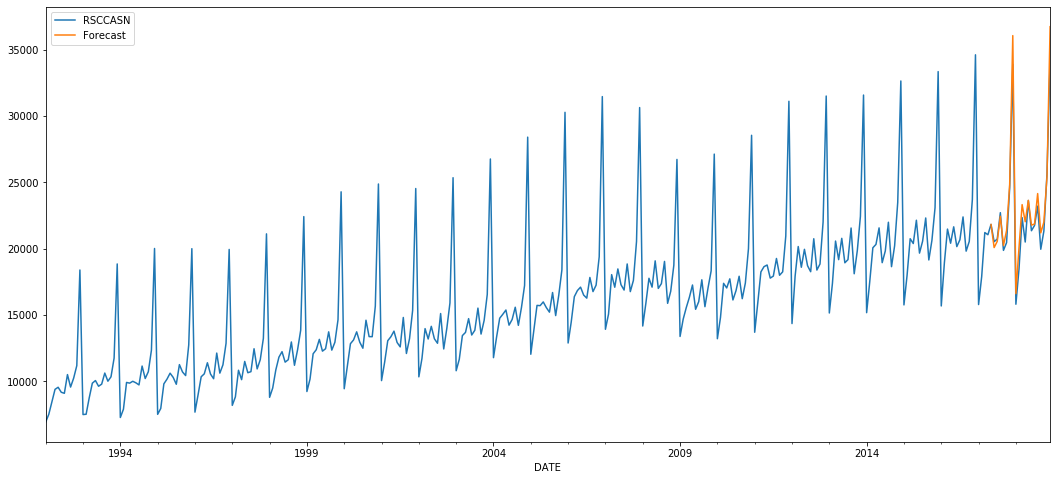

In [265]:
ax=data.plot()
pred_forecast.plot(ax=ax,label='Predicted')

In [102]:
"""
    The SARIMAX model seems to be working good
    
    The model is able to pickup the trends which wasn't able to be picked by 
    previous LTSM model which can be found in the Repo

"""

In [164]:
"""
    
    Verifing the model performance with the help of 
    Walk_forward_Validation method
    
    This model Mean Absolute Error and Mean Absolute Percent Error 
    and GridSearchCV Mean Absolute Error and Mean Absolute Percent Error
    will be compared.
    
    
    The one with the lowest MAPE will be selected for the future prediction
    which are not in the dataset

"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")
entire_dataset=np.log(data.values)
n_test=20
def walk_forward_validation(data, n_test):  
    predictions =[]
    log_predictions=[]
    mape_list = []
    test_ind=len(data)-n_test
    train, test = data[:test_ind], data[test_ind:]  
    train,test=train_test_split(data,test_size=n_test)
    history=[x for x in data]
        
    for i in range(len(test)):
        
        
        # Fit model to training data
        model=sm.tsa.statespace.SARIMAX(history,order=(2,1,2),seasonal_order=(2,1,2,36)).fit(max_iter=50,method="powell")

        
        # Forecast daily loads for week i
        forecast = model.predict(len(history),len(history))
        output=forecast[0]
        predictions.append(forecast)      
        #Calculate MAPE and add to mape_list
        obs=test[i]
        print('predicted=%f, expected=%f' % (output, obs))
        history.append(obs)
        
#     #Calculate MAPE and add to mape_list   
# #     pred_forecast = unlog_pred(log_predictions.predicted_mean)
# #     predictions.append(pred_forecast)
    
            

   
# #     true_value=np.exp(test.values)
# #     forcast=pred_forecast.values
#     print('predicted=%f, expected=%f' % (pred, true_value))
        
#     mape = (abs(forcast-true_value)/true_value)*100
#     mape_list.append(mape)
        
    
    error = mean_squared_error(test, predictions)
    rmse = mean_squared_error(test, predictions)**0.5
        
    return predictions,error,rmse

In [165]:
preddictions,error,rmse=walk_forward_validation(entire_dataset,n_test=n_test)

Optimization terminated successfully.
         Current function value: -1.698183
         Iterations: 5
         Function evaluations: 579
predicted=9.715214, expected=9.619665
Optimization terminated successfully.
         Current function value: -1.689418
         Iterations: 5
         Function evaluations: 593
predicted=9.861363, expected=9.196951
Optimization terminated successfully.
         Current function value: -1.365361
         Iterations: 11
         Function evaluations: 1314
predicted=9.446373, expected=9.727168
Optimization terminated successfully.
         Current function value: -1.348405
         Iterations: 6
         Function evaluations: 744
predicted=9.616053, expected=9.962558
Optimization terminated successfully.
         Current function value: -1.323970
         Iterations: 5
         Function evaluations: 581
predicted=9.890827, expected=9.788750
Optimization terminated successfully.
         Current function value: -1.324637
         Iterations: 5
         

In [205]:
print(preddictions)


[array([9.71521398]), array([9.86136348]), array([9.44637306]), array([9.61605309]), array([9.89082745]), array([9.72866044]), array([9.86046842]), array([9.76197079]), array([9.45591187]), array([9.62327346]), array([9.46005009]), array([9.99581189]), array([9.01633636]), array([9.33904384]), array([9.61109133]), array([9.46074922]), array([9.76071337]), array([9.33097857]), array([9.68725973]), array([9.57682496])]


In [206]:
print('Test MSE: %.3f' % rmse)

Test MSE: 0.352


In [232]:
test_ind=len(entire_dataset)-n_test
# train, test = data[:test_ind], entire_dataset[test_ind:]  
train,test=train_test_split(entire_dataset,test_size=n_test)


In [253]:
predictions = pd.Series(preddictions, copy=True)
predictions=predictions.values.reshape(predictions.shape[0],-1)
predictions.shape

(20, 1)

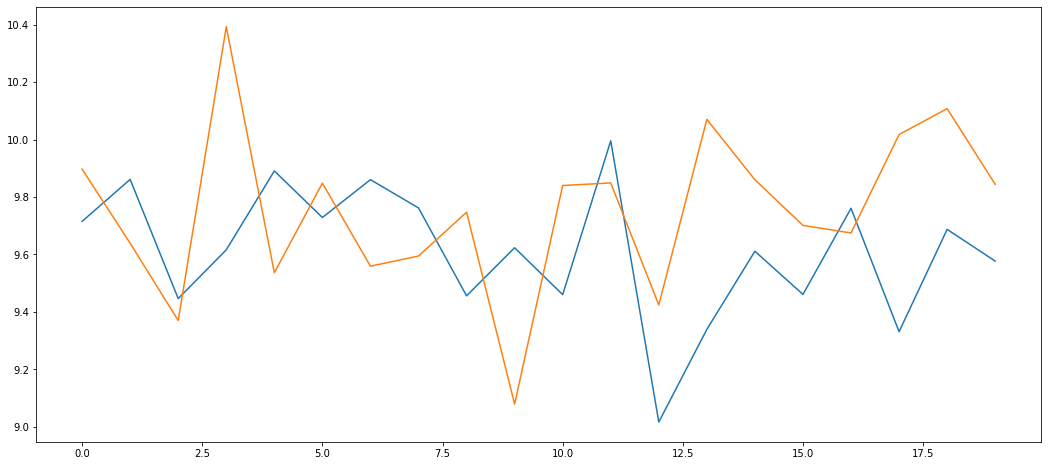

In [254]:
plt.plot(preddictions)
plt.plot(test)

In [255]:
true_value=test
forcast=predictions

In [256]:
mape = (abs(forcast-true_value)/true_value)*100
mape.mean()

array([3.39102459])

In [266]:
"""
    The Mean Absolute Error and Mean Absolute Percent Error of both the Grid Search CV 
    and the Walk_forward_validation model came out to be: 3.391
    
    SO, any of the model can be used
"""


######################NOTE################################################3

"""
    The predictions made through the Walk_Forward_Validation 
    are still in log form.
    
    
    They needed to transformed to show better graphical relation
    
    I having some data issues will update it soon


"""





'\n    The predictions made through the Walk_Forward_Validation \n    are still in log form.\n    \n    \n    They needed to transformed to show better graphical relation\n    \n    I having some data issues will update it soon\n\n\n'

In [271]:
"""
    Future Time Casting sar model
"""

sar_forcaster=sm.tsa.statespace.SARIMAX(np.log(data.RSCCASN), 
                                order=(2,1,2), 
                                seasonal_order=(2,1,2,36)).fit(max_iter = 50, method = 'powell')
sar_forcaster.summary()

Optimization terminated successfully.
         Current function value: -1.698183
         Iterations: 5
         Function evaluations: 579


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            RSCCASN   No. Observations:                  324
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 36)   Log Likelihood                 550.211
Date:                            Fri, 05 Jun 2020   AIC                          -1082.422
Time:                                    19:23:10   BIC                          -1049.487
Sample:                                01-01-1992   HQIC                         -1069.222
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7623      0.256     -2.974      0.003      -1.265      -0.260
ar.L2         -0.2907      0.095     -3.060      0.002      -0.477      -0.105
ma.L1          0.0695      0.263      0.265      0.791      -0.445       0.584
ma.L2         -0.1856      0.181     -1.023      0.307      -0.541       0.170
ar.S.L36      -0.3587      2.780     -0.129      0.897      -5.808       5.091
ar.S.L72       0.3658      2.341      0.156      0.876      -4.222       4.954
ma.S.L36       0.0742      2.790      0.027      0.979      -5.394       5.542
ma.S.L72      -0.2079      1.571     -0.132      0.895      -3.287       2.871
sigma2         0.0012   9.37e-05     12.964      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      149.74   Jarque-Bera (JB):                25.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.15
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [273]:
pred_forecast_log = sar_forcaster.get_forecast(steps = 30)
pred_forecast = unlog_pred(pred_forecast_log.predicted_mean)

In [274]:
print(pred_forecast)

2019-01-01    16567.760990
2019-02-01    19777.376278
2019-03-01    22580.300103
2019-04-01    21204.002061
2019-05-01    22845.998825
2019-06-01    21203.574418
2019-07-01    21383.052166
2019-08-01    23812.224063
2019-09-01    20399.498846
2019-10-01    21479.476238
2019-11-01    24695.483403
2019-12-01    35521.960226
2020-01-01    16463.185190
2020-02-01    18669.212350
2020-03-01    21890.326631
2020-04-01    21634.844424
2020-05-01    23089.183172
2020-06-01    20818.652484
2020-07-01    21416.864363
2020-08-01    23783.039821
2020-09-01    19982.789777
2020-10-01    21178.839220
2020-11-01    25229.466097
2020-12-01    34082.493783
2021-01-01    16424.952846
2021-02-01    18521.486777
2021-03-01    22059.405738
2021-04-01    21069.953646
2021-05-01    23996.325401
2021-06-01    21190.598418
Freq: MS, dtype: float64


In [275]:
forecaster_index=pd.date_range(start='2019-01-01',periods=n_test,freq="MS")
forecaster_index
pred_forecast=pd.DataFrame(data=pred_forecast,index=forecaster_index,columns=['Forecast'])


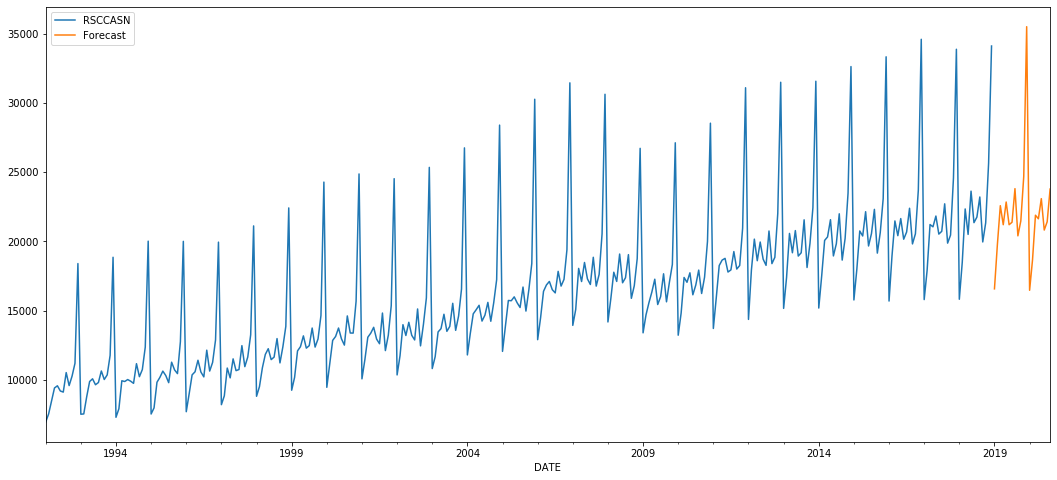

In [277]:
ax=data.plot()
pred_forecast.plot(ax=ax)


In [278]:
"""
    Seems that model get the trend
"""


'\n    Seems that model get the trend\n'